In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2RvbmFsZGhhbGUvRG9jdW1lbnRzL0lBQU1ML01MQm9vaw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749746015.7416215, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749746015.7570558, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749746013.3245404, "/opt/anaconda3/lib/python3.13/codecs.py": 1749746012.57125, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749746014.1131392, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749746014.1056273, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749746014.921781, "/opt/anaconda3/lib/python3.13/abc.py": 1749746012.4960408, "/opt/anaconda3/lib/python3.13/io.py": 1749746012.8010643, "/opt/anaconda3/lib/python3.13/stat.py": 1749746013.1405113, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749746012.3873768, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749746012.7239525, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749746012.9542572, "/opt/anaconda3/lib/python3.13/os.py": 1749746012.9050896, "/opt/anaconda3/lib/python3.13/_sitebuiltin

In [2]:
import sys
print("Active Python interpreter:", sys.executable)

import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
import inspect

# --- Fix for SciPy >= 1.13 removing .A from sparse matrices ---
import scipy.sparse as sp

if not hasattr(sp.spmatrix, "A"):
    def _toarray(self):
        return self.toarray()
    sp.spmatrix.A = property(_toarray)
# -------------------------------------------------------------

np.random.seed(4321)

Active Python interpreter: /opt/anaconda3/bin/python


In [3]:
from sklearn.datasets import fetch_openml

ames = fetch_openml(name="house_prices", as_frame=True).frame

keep = {
    "SalePrice":"SalePrice",
    "BedroomAbvGr":"Bedroom_AbvGr",
    "YearBuilt":"Year_Built",
    "MoSold":"Mo_Sold",
    "LotArea":"Lot_Area",
    "Street":"Street",
    "CentralAir":"Central_Air",
    "1stFlrSF":"First_Flr_SF",
    "2ndFlrSF":"Second_Flr_SF",
    "FullBath":"Full_Bath",
    "HalfBath":"Half_Bath",
    "Fireplaces":"Fireplaces",
    "GarageArea":"Garage_Area",
    "GrLivArea":"Gr_Liv_Area",
    "TotRmsAbvGrd":"TotRms_AbvGrd"
}

df = ames[list(keep.keys())].rename(columns=keep).dropna().copy()

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"].values

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Handle OneHotEncoder version changes and ensure dense output
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
else:
    encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", encoder, cat_cols)
], sparse_threshold=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)
df.head()

,SalePrice,Bedroom_AbvGr,Year_Built,Mo_Sold,Lot_Area,Street,Central_Air,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Fireplaces,Garage_Area,Gr_Liv_Area,TotRms_AbvGrd
0,208500,3,2003,2,8450,Pave,Y,856,854,2,1,0,548,1710,8
1,181500,3,1976,5,9600,Pave,Y,1262,0,2,0,1,460,1262,6
2,223500,3,2001,9,11250,Pave,Y,920,866,2,1,1,608,1786,6
3,140000,3,1915,2,9550,Pave,Y,961,756,1,0,1,642,1717,7
4,250000,4,2000,12,14260,Pave,Y,1145,1053,2,1,1,836,2198,9


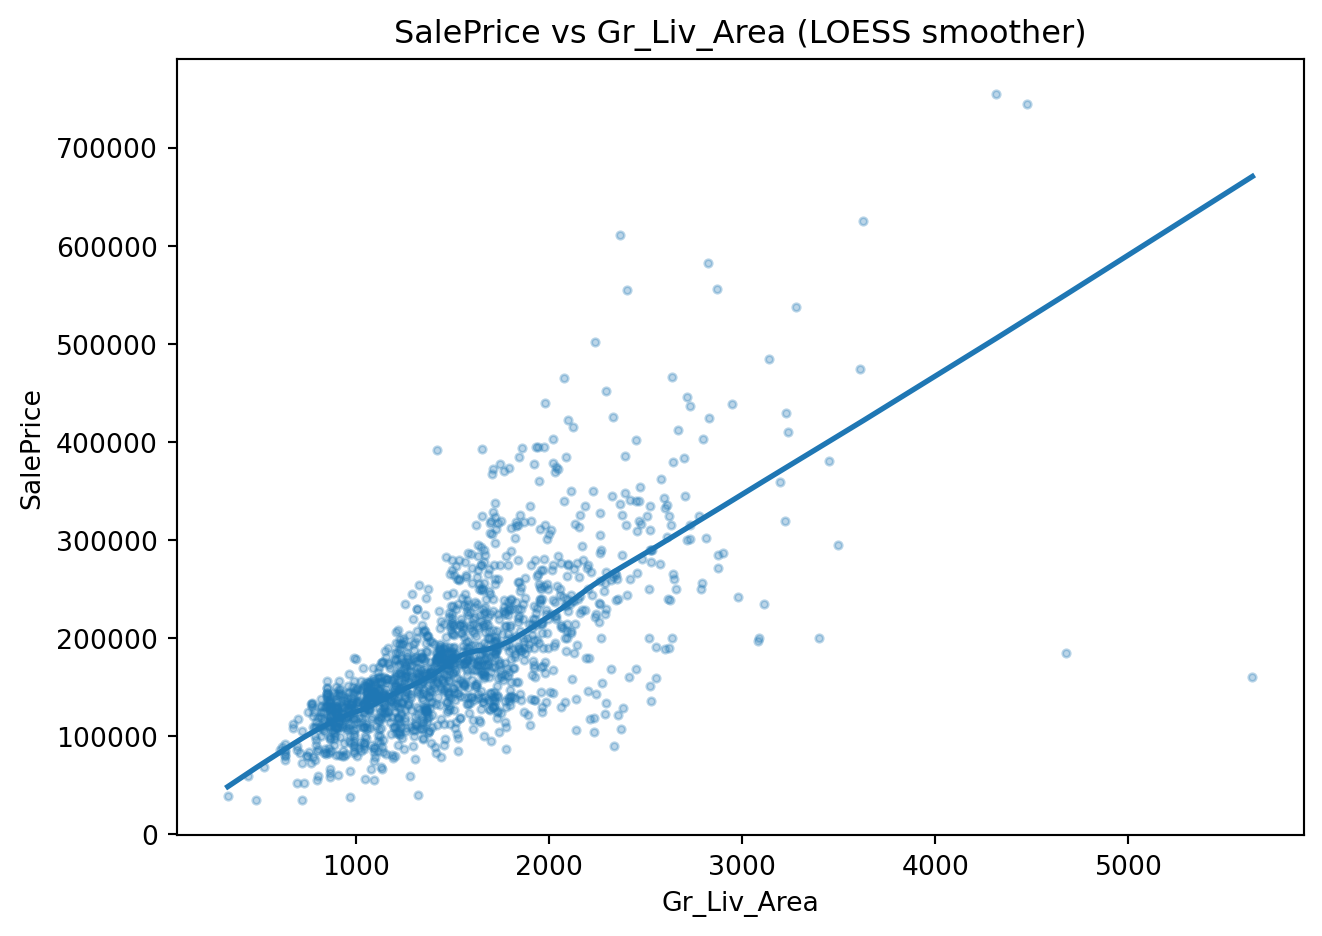

In [4]:
import statsmodels.api as sm
fig = plt.figure()
plt.scatter(df["Gr_Liv_Area"], df["SalePrice"], s=8, alpha=0.3)
low = sm.nonparametric.lowess(df["SalePrice"], df["Gr_Liv_Area"], frac=0.3, return_sorted=True)
plt.plot(low[:,0], low[:,1], linewidth=2)
plt.title("SalePrice vs Gr_Liv_Area (LOESS smoother)")
plt.xlabel("Gr_Liv_Area"); plt.ylabel("SalePrice")
plt.tight_layout()

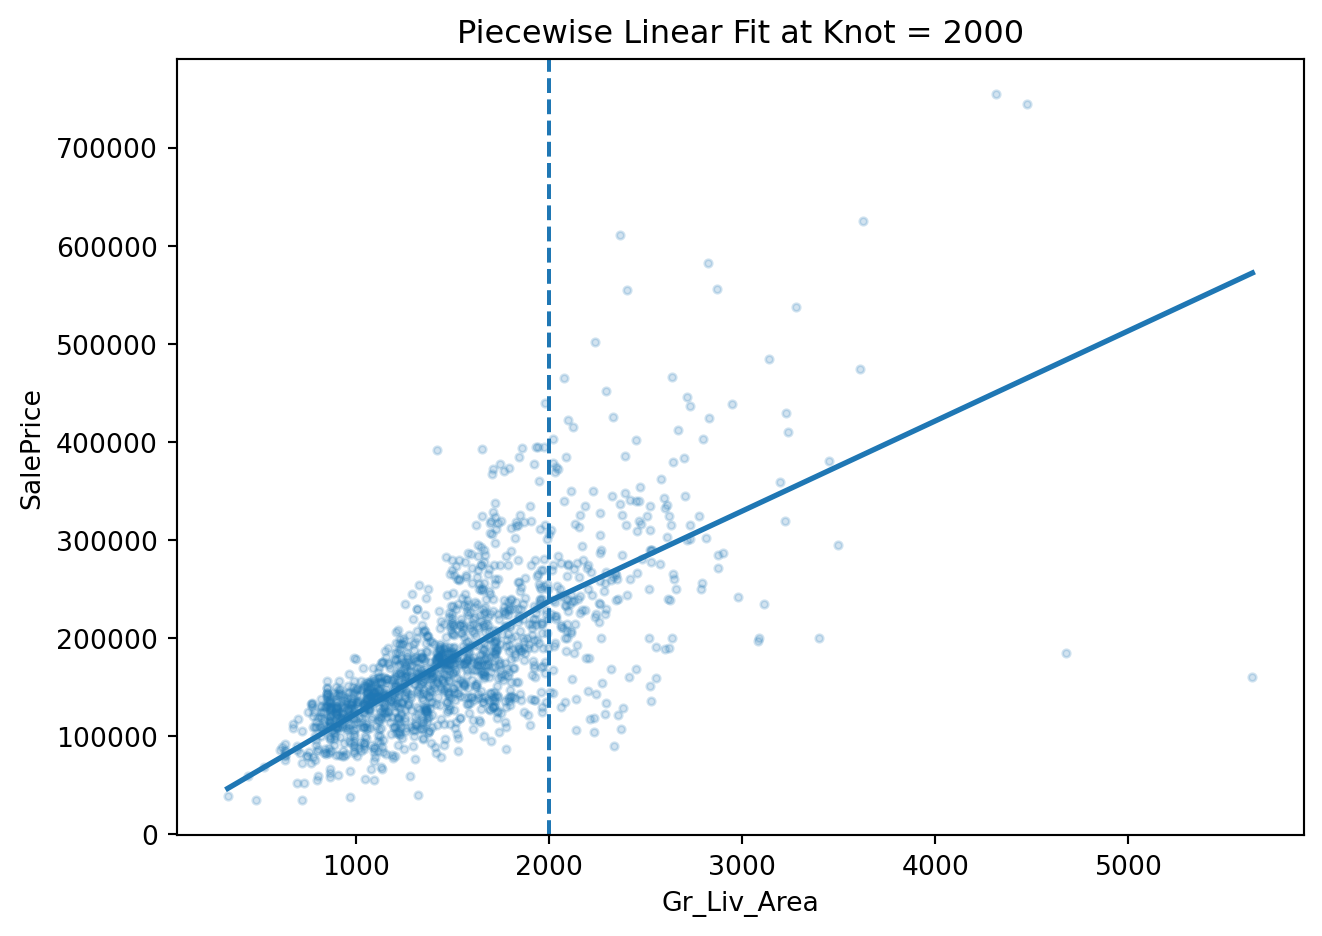

In [5]:
class PiecewiseLinear:
    def __init__(self, knot=2000.0):
        self.knot = knot
        self.lin = LinearRegression()

    def _transform(self, x):
        x1 = np.asarray(x).reshape(-1,1)
        hx = np.maximum(0, x1 - self.knot)
        return np.hstack([x1, hx])

    def fit(self, x, y):
        Z = self._transform(x)
        self.lin.fit(Z, y)
        return self

    def predict(self, x):
        Z = self._transform(x)
        return self.lin.predict(Z)

pw = PiecewiseLinear(knot=2000).fit(df["Gr_Liv_Area"].values, df["SalePrice"].values)

grid = np.linspace(df["Gr_Liv_Area"].min(), df["Gr_Liv_Area"].max(), 200)
pred = pw.predict(grid)

plt.figure()
plt.scatter(df["Gr_Liv_Area"], df["SalePrice"], s=8, alpha=0.2)
plt.plot(grid, pred, linewidth=2)
plt.axvline(2000, linestyle="--")
plt.title("Piecewise Linear Fit at Knot = 2000")
plt.xlabel("Gr_Liv_Area"); plt.ylabel("SalePrice")
plt.tight_layout()

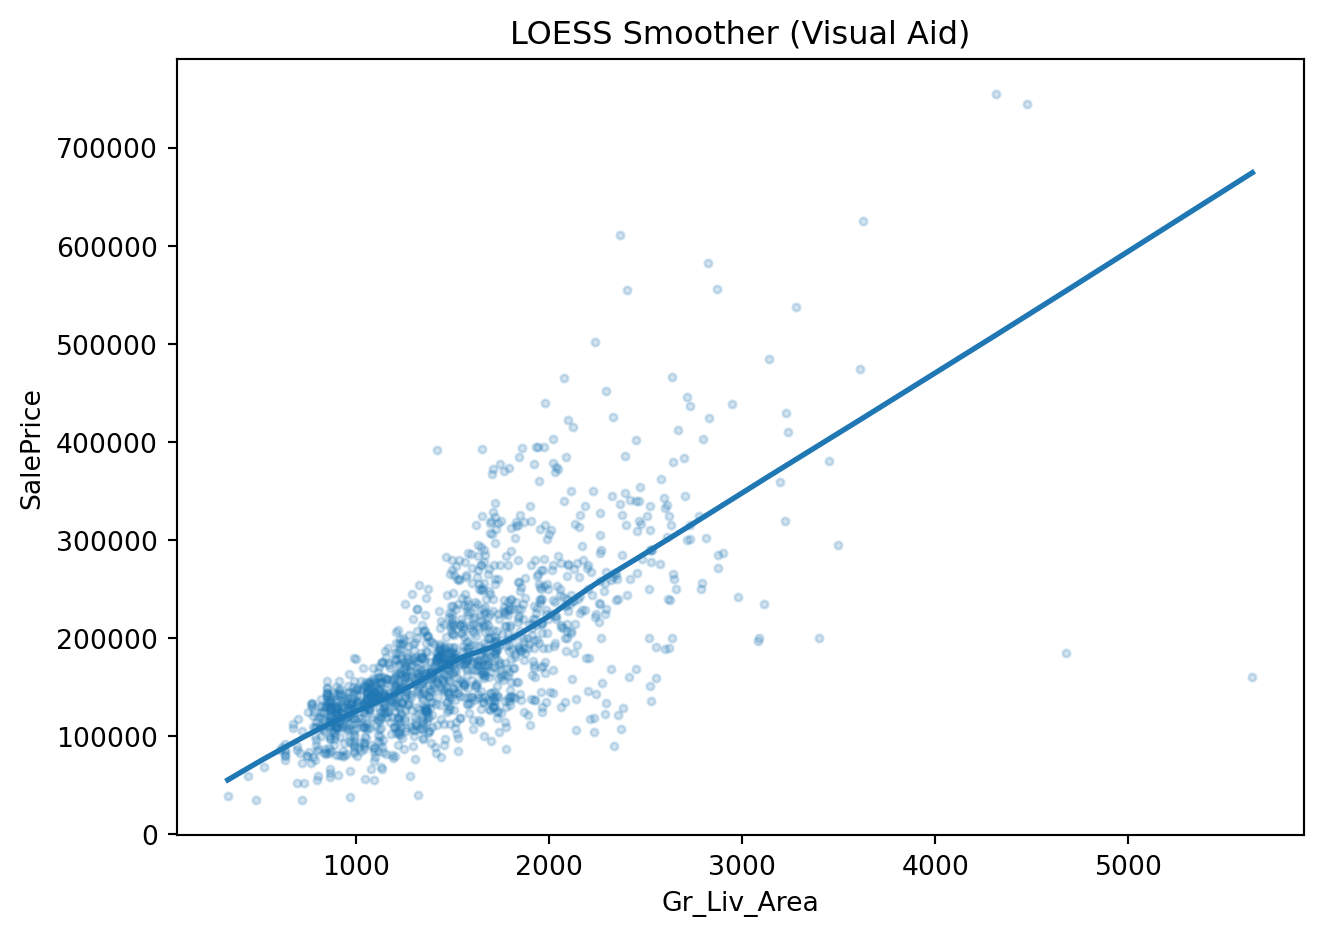

In [6]:
fig = plt.figure()
plt.scatter(df["Gr_Liv_Area"], df["SalePrice"], s=8, alpha=0.2)
low = sm.nonparametric.lowess(df["SalePrice"], df["Gr_Liv_Area"], frac=0.4, return_sorted=True)
plt.plot(low[:,0], low[:,1], linewidth=2)
plt.title("LOESS Smoother (Visual Aid)")
plt.xlabel("Gr_Liv_Area"); plt.ylabel("SalePrice")
plt.tight_layout()

In [7]:
from pygam import LinearGAM, s
gam1 = LinearGAM(s(0)).fit(X_train[["Garage_Area"]].values, y_train)
print(gam1.summary())
gam2 = LinearGAM(s(0) + s(1)).fit(X_train[["Garage_Area","Gr_Liv_Area"]].values, y_train)
print(gam2.summary())
num_train = X_train[num_cols].values
gam3 = LinearGAM().fit(num_train, y_train)
print(gam3.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.7399
Link Function:                     IdentityLink Log Likelihood:                                -23263.1874
Number of Samples:                         1022 AIC:                                            46551.8545
                                                AICc:                                           46552.2017
                                                GCV:                                       3130152370.8794
                                                Scale:                                     3065497547.8147
                                                Pseudo R-Squared:                                   0.4883
Feature Function                  Lam

/var/folders/v0/1fynz4dx4sd1h7nxwmvzrxf00000gn/T/ipykernel_92520/2456984288.py:3: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 


/var/folders/v0/1fynz4dx4sd1h7nxwmvzrxf00000gn/T/ipykernel_92520/2456984288.py:5: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 


/var/folders/v0/1fynz4dx4sd1h7nxwmvzrxf00000gn/T/ipykernel_92520/2456984288.py:8: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [8]:
from patsy import dmatrix

design_tr = dmatrix("bs(Garage_Area, df=6) + bs(Gr_Liv_Area, df=6)", data=X_train, return_type="dataframe")
design_te = dmatrix("bs(Garage_Area, df=6) + bs(Gr_Liv_Area, df=6)", data=X_test, return_type="dataframe")

ridge = Ridge(alpha=1.0).fit(design_tr, y_train)
pred_spline = ridge.predict(design_te)

In [9]:
def rmse(y, yhat):
    try:
        return mean_squared_error(y, yhat, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y, yhat))

def mse(y, yhat): return mean_squared_error(y, yhat)
def rsq(y, yhat): return r2_score(y, yhat)

p_piece = pw.predict(X_test["Gr_Liv_Area"].values)

try:
    p_gam = gam3.predict(X_test[num_cols].values)
except Exception:
    p_gam = np.full_like(y_test, np.nan, dtype=float)

p_spline = pred_spline

cmp = pd.DataFrame({
    "Model": ["Piecewise", "GAM (pyGAM)" if not np.isnan(p_gam).all() else "GAM (not available)", "Regression Spline"],
    "RMSE": [rmse(y_test, p_piece), rmse(y_test, p_gam) if not np.isnan(p_gam).all() else np.nan, rmse(y_test, p_spline)],
    "MSE": [mse(y_test, p_piece), mse(y_test, p_gam) if not np.isnan(p_gam).all() else np.nan, mse(y_test, p_spline)],
    "R2": [rsq(y_test, p_piece), rsq(y_test, p_gam) if not np.isnan(p_gam).all() else np.nan, rsq(y_test, p_spline)]
}).sort_values("R2", ascending=False)

cmp

,Model,RMSE,MSE,R2
1,GAM (pyGAM),40805.867162,1.665119e+09,0.766556
0,Piecewise,58108.537553,3.376602e+09,0.526612
2,Regression Spline,60289.000524,3.634764e+09,0.490419


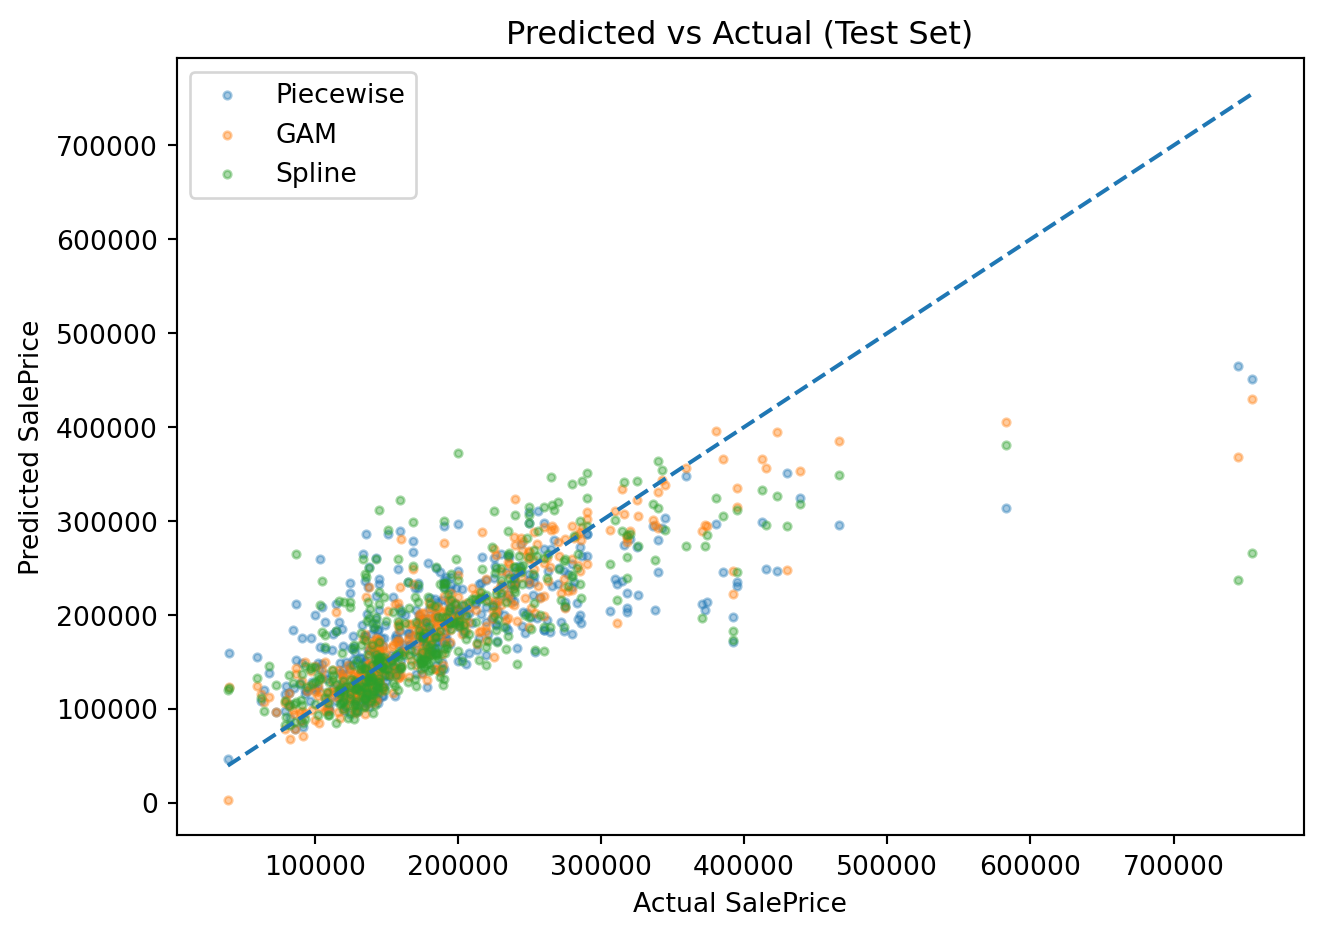

In [10]:
plt.figure()
plt.scatter(y_test, p_piece, s=8, alpha=0.4, label="Piecewise")
if not np.isnan(p_gam).all():
    plt.scatter(y_test, p_gam, s=8, alpha=0.4, label="GAM")
plt.scatter(y_test, p_spline, s=8, alpha=0.4, label="Spline")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.legend()
plt.title("Predicted vs Actual (Test Set)")
plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
plt.tight_layout()